In [1]:
import modin.pandas as pd
# import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import re
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import ast

pd.set_option('display.max_colwidth', None)

In [4]:
annotated_data_dir = "C:\\Users\\eshad\\OneDrive\\Desktop\\TU Delft\\Thesis\\Data Scraping\\Data\\7. Deduplicated data\\"

In [5]:
dataframes = []
folders = ["Batch 1\\", "Batch 2\\", "Batch 3\\"]
# Read all files in the directory
for folder_name in folders:
    for file_name in os.listdir(os.path.join(annotated_data_dir, folder_name)):
        if file_name.endswith('removed_words.csv'): 
            print(file_name)
            file_path = os.path.join(annotated_data_dir, folder_name, file_name)
            tmp_df = pd.read_csv(file_path)
            dataframes.append(tmp_df)
df = pd.concat(dataframes)
print(len(df))
df.head()

annotated_data_2014_removed_words.csv


2025-05-08 10:54:04,699	INFO worker.py:1841 -- Started a local Ray instance.
Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


annotated_data_2016_removed_words.csv
annotated_data_2018_removed_words.csv
annotated_data_2020_removed_words.csv
annotated_data_2022_removed_words.csv
annotated_data_2024_removed_words.csv
annotated_data_2014_batch_2_removed_words.csv
annotated_data_2016_batch_2_removed_words.csv
annotated_data_2018_batch_2_removed_words.csv
annotated_data_2020_batch_2_removed_words.csv
annotated_data_2022_batch_2_removed_words.csv
annotated_data_2024_batch_2_removed_words.csv
annotated_data_2016_batch_3_removed_words.csv
annotated_data_2018_batch_3_removed_words.csv
469967


Unnamed: 0  jobPostingId  \
0           0      11795027   
1           1      11792909   
2           2      11792825   
3           3      11792393   
4           4      11789549   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       companyDetails  \
0                                                                                                                                                                                            {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:28199', 'name': 'AVG Technologies', 'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200, 'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1631318565050?e=1744848000&v=beta&t=LIHp-tJDzR5-Sq9hZZ4vp6jWFAWCZUrHO_qCZr-NacY', 'expiresAt': 1744848000000, 'height': 200}, {'width': 100, 'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1631318565050?e=1744848000&v=beta&t=ogUWLnpQfZjVGQqVdermna6G2weVrVCi8-VH-uw6ccU', 'expiresAt': 1744848000000, 'height': 100}, {'width': 400, 'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/0/1631318565050?e=1744848000&v=beta&t=MvWvxnfHd0NzgcneRdM9m0V3w9mnGhtuXuG4Z1oN66A', 'expiresAt': 1744848000000, 'height': 400}], 'rootUrl': 'https://media.licdn.com/dms/image/v2/C4E0BAQHSlNdIRIJ0Qg/company-logo_'}}, 'type': 'SQUARE_LOGO'}, '$recipeType': 'com.linkedin.voyager.deco.organization.shared.WebCompactCompany', 'universalName': 'avg', 'url': 'https://www.linkedin.com/company/avg'}, 'company': 'urn:li:fs_normalized_company:28199', '$recipeType': 'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany'}}   
1                                                                                                        {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:1319', 'name': 'Lockheed Martin', 'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200, 'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1668532986109/lockheed_martin_logo?e=1744848000&v=beta&t=zqO3uNbro0oYkT1X4URDVYv1eu1GoOPx_9PskpuIsCU', 'expiresAt': 1744848000000, 'height': 200}, {'width': 100, 'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1668532986109/lockheed_martin_logo?e=1744848000&v=beta&t=KUSDmYH3-NpeHG0nTL-8ZRpwNVxzYo_eaYpIa8P2kf0', 'expiresAt': 1744848000000, 'height': 100}, {'width': 400, 'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/

## Year

In [4]:
# Count occurrences of each gender category per year
yearly_gender_counts = df.groupby(['year', 'gender_category']).size().unstack(fill_value=0)

# Convert counts to percentages
yearly_gender_percentages = yearly_gender_counts.div(yearly_gender_counts.sum(axis=1), axis=0) * 100

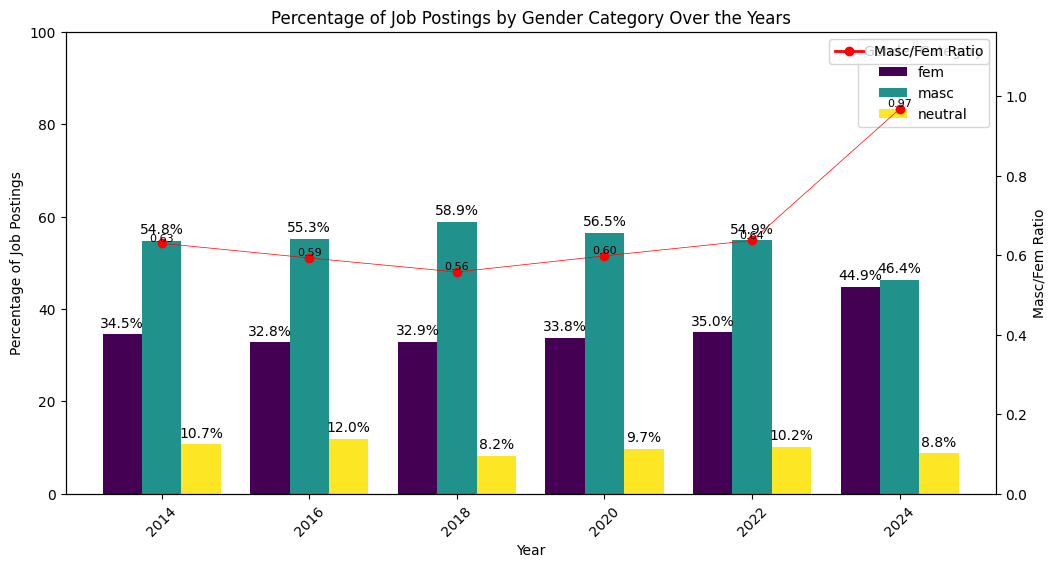

In [38]:
# Compute male-to-female ratio (masc / fem)
yearly_gender_counts['masc_to_fem_ratio'] = yearly_gender_counts['fem']/yearly_gender_counts['masc']
yearly_gender_counts.replace([float('inf'), float('-inf')], None, inplace=True)  # Handle division by zero

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for gender category percentages
yearly_gender_percentages.plot(kind='bar', colormap='viridis', ax=ax1, width=0.8)
ax1.set_xlabel("Year")
ax1.set_ylabel("Percentage of Job Postings")
ax1.set_title("Percentage of Job Postings by Gender Category Over the Years")
ax1.set_xticklabels(yearly_gender_percentages.index, rotation=45)
ax1.legend(title="Gender Category")
ax1.set_ylim(0, 100)

# Add percentage labels on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

# Create a second y-axis for the ratio line plot
ax2 = ax1.twinx()
ax2.plot(yearly_gender_counts.index, yearly_gender_counts['masc_to_fem_ratio'], 
         color='red', marker='o', linestyle='-', linewidth=2, label="Masc/Fem Ratio")

ax2.set_ylabel("Male-to-Female Ratio")
ax2.set_ylim(0, yearly_gender_counts['masc_to_fem_ratio'].max() * 1.2)  # Set y-limit slightly above max ratio


# Ensure x values are aligned with the bar positions: here we use the index from our DataFrame
ax2.plot(yearly_gender_counts.index.astype(str),
         yearly_gender_counts['masc_to_fem_ratio'],
         color='red', marker='o', linestyle='-', linewidth=0.5)
ax2.set_ylabel("Masc/Fem Ratio")
max_ratio = yearly_gender_counts['masc_to_fem_ratio'].max()
if pd.notnull(max_ratio):
    ax2.set_ylim(0, max_ratio * 1.2)
else:
    ax2.set_ylim(0, 1)


# Annotate the ratio values on the line plot
for i, ratio in enumerate(yearly_gender_counts['masc_to_fem_ratio']):
    if pd.notnull(ratio):
        ax2.text(i, ratio, f"{ratio:.2f}", ha='center', va='bottom', fontsize=8, color='black')


# # Show legend for the ratio line
ax2.legend(loc="upper right")

plt.show()

In [5]:
# Total job postings per year
year_totals = yearly_gender_counts.sum(axis=1)

# Create labels like: "2014 (2,341)"
year_labels_with_counts = [f"{year} ({count:,})" for year, count in year_totals.items()]
year_labels_with_counts

['2014 (96,506)',
 '2016 (106,978)',
 '2018 (55,115)',
 '2020 (45,636)',
 '2022 (87,753)',
 '2024 (77,979)']

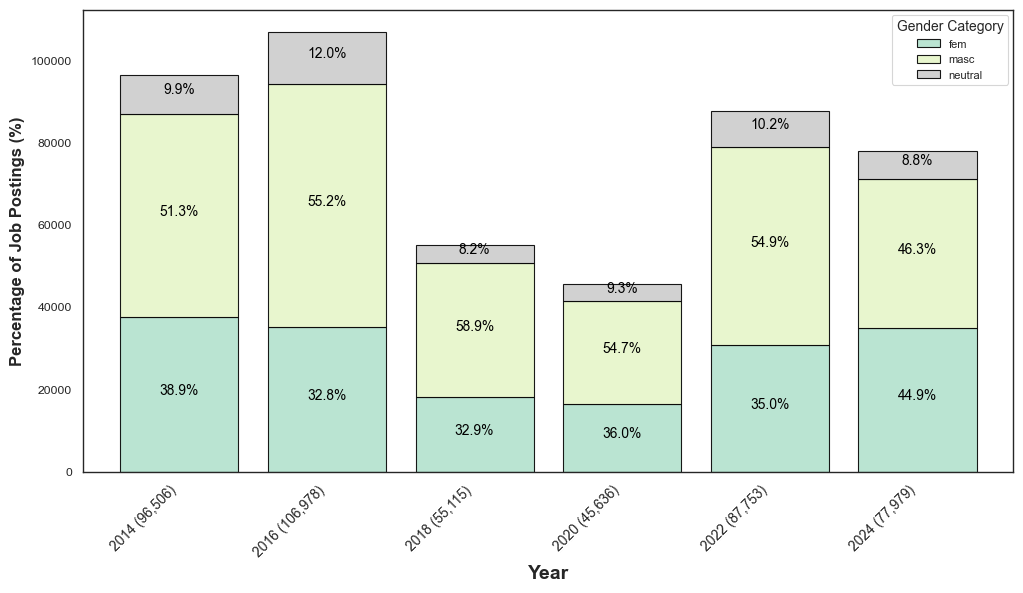

In [17]:
# Use a research-style seaborn theme
sns.set_theme(style="white")
sns.set_context("paper")
# Compute female-to-male ratio (fem / masc)
# yearly_gender_counts['fem_to_masc_ratio'] = yearly_gender_counts['fem'] / yearly_gender_counts['masc']
yearly_gender_counts.replace([float('inf'), float('-inf')], None, inplace=True)  # Handle division by zero

# Define figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for gender category percentages
yearly_gender_counts.plot(kind='bar', stacked=True, colormap="Pastel2", ax=ax1, width=0.8, alpha=0.9, edgecolor="black")

ax1.set_xticks(range(len(year_labels_with_counts)))
ax1.set_xticklabels(year_labels_with_counts, rotation=45, ha='right', fontsize=10)

# Axis labels and title with research-style formatting
ax1.set_xlabel("Year", fontsize=14, fontweight="bold")
ax1.set_ylabel("Percentage of Job Postings (%)", fontsize=12, fontweight="bold")
# ax1.set_title("Gender Distribution in Job Postings Over Time", fontsize=16, fontweight="bold", pad=15)
# ax1.set_xticklabels(yearly_gender_percentages.index, rotation=45, fontsize=12)
ax1.legend(title="Gender Category", fontsize=8, title_fontsize=10)

# Add percentage labels on top of bars
# for container in ax1.containers:
#     ax1.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, padding=3, color='black')



for i, container in enumerate(ax1.containers):
    # Get column name by index (e.g., 'fem', 'masc', 'neutral')
    col_name = yearly_gender_percentages.columns[i]

    # Extract values for this column across all years
    labels = [f'{v:.1f}%' if v > 0 else '' for v in yearly_gender_percentages[col_name]]
    # Add percentage labels to bar segments
    ax1.bar_label(container, labels=labels, label_type='center',
                 fontsize=10, padding=3, color='black')


# Tight layout for better spacing
# plt.tight_layout()
plt.savefig('Visualizations/over_time.png', bbox_inches='tight')
plt.show()

## Country

In [6]:
len(df['country'].unique())

218

In [8]:
top_countries = df['country'].value_counts().nlargest(20)
# Filter dataset to include only these countries
df_filtered = df[df['country'].isin(top_countries.index)]
# Count occurrences of each gender category per country
country_gender_counts = df_filtered.groupby(['country', 'gender_category']).size().unstack(fill_value=0)
# Reorder rows to match the order of 'top_countries'
country_gender_counts = country_gender_counts.loc[top_countries.index]
# Convert counts to percentages within each country
country_gender_percentages = country_gender_counts.div(country_gender_counts.sum(axis=1), axis=0) * 100

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


In [9]:
# Create custom x-axis labels with counts
country_labels_with_counts = [f"{country} ({country_gender_counts.loc[country].sum():,})" for country in country_gender_counts.index]

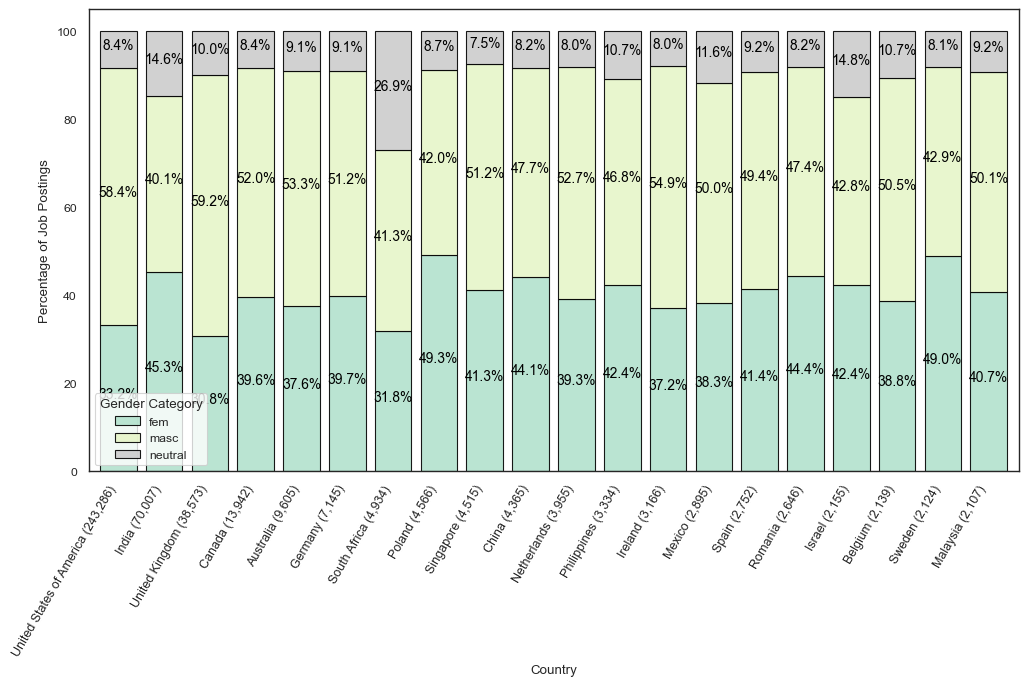

In [16]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
country_gender_percentages.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax, width=0.8, alpha=0.9, edgecolor="black")

# Apply labels
ax.set_xticks(range(len(country_labels_with_counts)))
ax.set_xticklabels(country_labels_with_counts, rotation=60, ha='right', fontsize=9)

plt.xlabel("Country")
plt.ylabel("Percentage of Job Postings")
# plt.title("Percentage of Job Postings by Gender Category in Top 10 Countries (Sorted by Total Jobs)")
plt.xticks(rotation=60)
plt.legend(title="Gender Category")
# plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, padding=3, color='black')


plt.savefig('Visualizations/country.png', bbox_inches='tight')
plt.show()
# maybe add 1 bar, total number of records with country

## Industry

In [12]:
top_industries = df['Industry'].value_counts().nlargest(20)
# Filter dataset to include only these countries
df_filtered_industries = df[df['Industry'].isin(top_industries.index)]
# Count occurrences of each gender category per country
industry_gender_counts = df_filtered_industries.groupby(['Industry', 'gender_category']).size().unstack(fill_value=0)
# Reorder rows to match the order of 'top_countries'
industry_gender_counts = industry_gender_counts.loc[top_industries.index]
# Convert counts to percentages within each country
industry_gender_percentages = industry_gender_counts.div(industry_gender_counts.sum(axis=1), axis=0) * 100

In [13]:
# Create custom x-axis labels with counts
industry_labels_with_counts = [f"{industry} ({industry_gender_counts.loc[industry].sum():,})" for industry in industry_gender_counts.index]

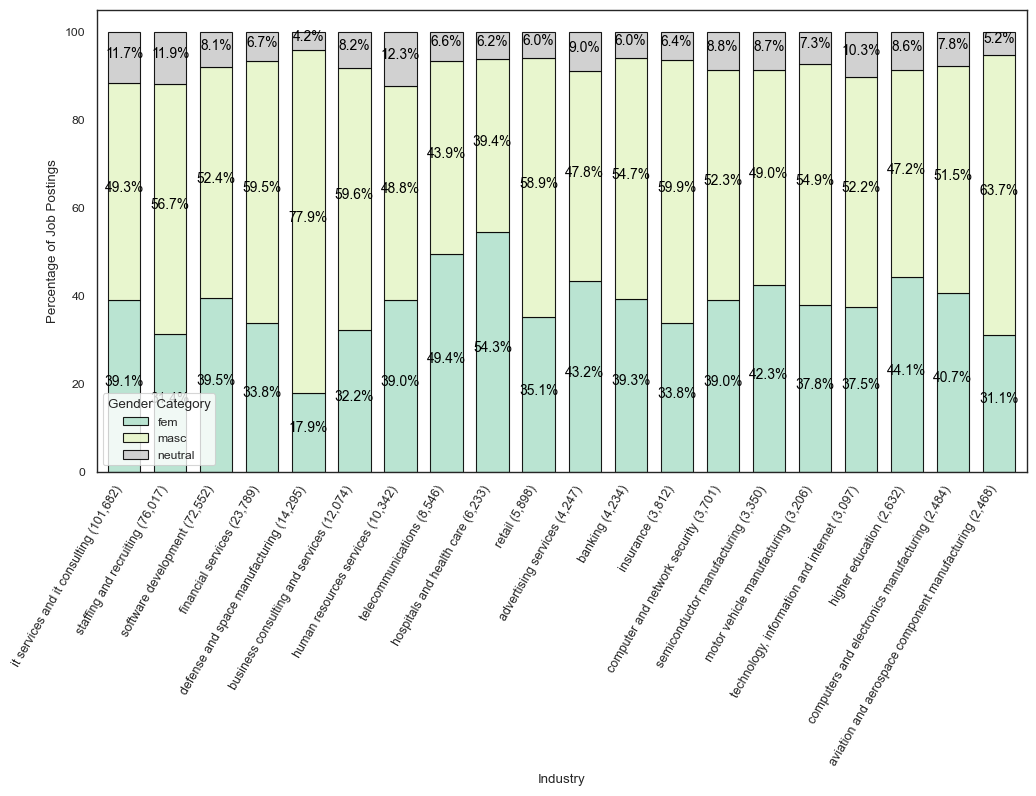

In [15]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
industry_gender_percentages.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax, width=0.7, alpha=0.9, edgecolor="black")

# Apply labels
ax.set_xticks(range(len(industry_labels_with_counts)))
ax.set_xticklabels(industry_labels_with_counts, rotation=60, ha='right', fontsize=9)

plt.xlabel("Industry")
plt.ylabel("Percentage of Job Postings")
# plt.title("Percentage of Job Postings by Gender Category in Top 10 Industries (Sorted by Total Jobs)")
plt.xticks(rotation=60)
plt.legend(title="Gender Category")
# plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in industry_gender_percentages.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=3, color='black')



plt.savefig('Visualizations/industry.png', bbox_inches='tight')

plt.show()

## Grouped Industries

In [7]:
industry_mapping = {
    "Technology and IT": [
        'software development', 'it services and it consulting',
        'computer and network security', 'technology, information and internet',
        'technology, information and media', 'computer games', 'computer networking products',
        'mobile gaming apps', 'internet publishing', 'internet marketplace platforms',
        'desktop computing software products', 'mobile computing software products',
        'data infrastructure and analytics', 'data security software products',
        'it system custom software development', 'it system data services',
        'it system training and support', 'blockchain services', 'wireless services',
        'business intelligence platforms', 'telecommunications', 'information services'
    ],
    "Healthcare and Life Sciences": [
        'hospitals', 'hospitals and health care', 'pharmaceutical manufacturing',
        'biotechnology research', 'mental health care', 'medical practices',
        'medical and diagnostic laboratories', 'home health care services',
        'veterinary services', 'alternative medicine', 'health and human services',
        'physicians', 'public health'
    ],
    "Manufacturing": [
        'defense and space manufacturing', 'oil and gas',
        'semiconductor manufacturing', 'industrial machinery manufacturing',
        'medical equipment manufacturing', 'machinery manufacturing', 'motor vehicle parts manufacturing',
        'computers and electronics manufacturing', 'textile manufacturing',
        'computer hardware manufacturing', 'renewable energy semiconductor manufacturing',
        'appliances, electrical, and electronics manufacturing', 'sporting goods manufacturing',
        'chemical manufacturing', 'motor vehicle manufacturing',
        'automation machinery manufacturing', 'food and beverage manufacturing',
        'beverage manufacturing', 'tobacco manufacturing', 'dairy product manufacturing',
        'packaging and containers manufacturing', 'furniture and home furnishings manufacturing',
        'glass, ceramics and concrete manufacturing', 'manufacturing',
        'paper and forest product manufacturing', 'plastics manufacturing',
        'climate technology product manufacturing', 'measuring and control instrument manufacturing'
    ],
    "Education and Research": [
        'higher education', 'research services', 'e-learning providers',
        'education administration programs', 'education', 'primary and secondary education',
        'libraries', 'think tanks', 'nanotechnology research'
    ],
    "Finance and Professional Services": [
        'financial services', 'insurance', 'accounting', 'market research',
        'capital markets', 'investment banking', 'investment management',
        'venture capital and private equity principals', 'business consulting and services',
        'human resources services', 'professional services',
        'strategic management services', 'executive search services',
        'operations consulting', 'banking'
    ],
    "Media and Entertainment": [
        'advertising services', 'public relations and communications services',
        'entertainment providers', 'broadcast media production and distribution',
        'media production', 'online audio and video media', 'musicians',
        'movies, videos, and sound', 'animation and post-production',
        'book and periodical publishing', 'newspaper publishing',
        'internet news', 'blogs', 'performing arts', 'artists and writers',
        'writing and editing', 'photography', 'business content'
    ],
    "Retail and Consumer Services": [
        'retail', 'retail luxury goods and jewelry', 'retail apparel and fashion',
        'retail groceries', 'retail office equipment', 'retail art supplies',
        'consumer services', 'restaurants', 'food and beverage services',
        'food and beverage retail', 'personal care product manufacturing'
    ],
    "Engineering and Construction": [
        'civil engineering', 'engineering services', 'construction',
        'architecture and planning', 'building construction', 'robotics engineering'
    ],
    "Transportation and Logistics": [
        'aviation and aerospace component manufacturing', 'airlines and aviation',
        'truck transportation', 'maritime transportation',
        'rail transportation', 'railroad equipment manufacturing',
        'urban transit services', 'freight and package transportation',
        'transportation, logistics, supply chain and storage',
        'ground passenger transportation', 'vehicle repair and maintenance',
        'transportation equipment manufacturing'
    ],
    "Energy and Environment": [
        'utilities', 'renewable energy power generation',
        'solar electric power generation', 'electric power generation',
        'renewable energy equipment manufacturing',
        'services for renewable energy', 'environmental services',
        'climate data and analytics'
    ],
    "Nonprofit, Government, and Policy": [
        'non-profit organizations', 'civic and social organizations',
        'government administration', 'international affairs', 'public safety',
        'public policy offices', 'government relations services',
        'political organizations', 'philanthropic fundraising services',
        'religious institutions', 'fundraising', 'armed forces',
        'legislative offices', 'law enforcement', 'administration of justice'
    ],
    "Law and Legal Services": [
        'law practice', 'legal services', 'alternative dispute resolution'
    ],
    "Arts and Design": [
        'graphic design', 'interior design'
    ],
    "Hospitality and Leisure": [
        'hospitality', 'travel arrangements', 'gambling facilities and casinos',
        'recreational facilities', 'events services', 'museums',
        'museums, historical sites, and zoos', 'spectator sports', 'wellness and fitness services'
    ],
    "Agriculture and Natural Resources": [
        'farming', 'horticulture', 'fisheries', 'mining'
    ],
    "Real Estate and Property": [
        'real estate', 'leasing non-residential real estate',
        'wholesale building materials'
    ],
    "Wholesale and Trade": [
        'wholesale', 'wholesale import and export'
    ],
    "Staffing and Human Capital": [
        'staffing and recruiting', 'executive offices'
    ],
    "Miscellaneous": [
        'printing services', 'design services', 'animation and post-production', 'professional training and coaching',
        'outsourcing and offshoring consulting', 'social networking platforms', 'individual and family services',
        'desktop computing software products', 'fire protection',  'warehousing and storage',
        'home health care services', 'taxi and limousine services', 'pet services', 'shipbuilding',
        'digital accessibility services', 'security and investigations', 'international trade and development',
        'holding companies', 'equipment', 'translation and localization', 'facilities services'
    ]
}


# Reverse mapping: role -> grouped_role
flat_mapping = {role: group for group, roles in industry_mapping.items() for role in roles}
flat_mapping

{'software development': 'Technology and IT',
 'it services and it consulting': 'Technology and IT',
 'computer and network security': 'Technology and IT',
 'technology, information and internet': 'Technology and IT',
 'technology, information and media': 'Technology and IT',
 'computer games': 'Technology and IT',
 'computer networking products': 'Technology and IT',
 'mobile gaming apps': 'Technology and IT',
 'internet publishing': 'Technology and IT',
 'internet marketplace platforms': 'Technology and IT',
 'desktop computing software products': 'Miscellaneous',
 'mobile computing software products': 'Technology and IT',
 'data infrastructure and analytics': 'Technology and IT',
 'data security software products': 'Technology and IT',
 'it system custom software development': 'Technology and IT',
 'it system data services': 'Technology and IT',
 'it system training and support': 'Technology and IT',
 'blockchain services': 'Technology and IT',
 'wireless services': 'Technology and 

In [8]:
# Apply mapping
df['grouped_industry'] = df['Industry'].map(flat_mapping).fillna(df['Industry'])
df.head()

Unnamed: 0  jobPostingId  \
0           0      11795027   
1           1      11792909   
2           2      11792825   
3           3      11792393   
4           4      11789549   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       companyDetails  \
0                                                                                                                                                                                            {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:28199', 'name': 'AVG Technologies', 'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200, 'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1631318565050?e=1744848000&v=beta&t=LIHp-tJDzR5-Sq9hZZ4vp6jWFAWCZUrHO_qCZr-NacY', 'expiresAt': 1744848000000, 'height': 200}, {'width': 100, 'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1631318565050?e=1744848000&v=beta&t=ogUWLnpQfZjVGQqVdermna6G2weVrVCi8-VH-uw6ccU', 'expiresAt': 1744848000000, 'height': 100}, {'width': 400, 'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/0/1631318565050?e=1744848000&v=beta&t=MvWvxnfHd0NzgcneRdM9m0V3w9mnGhtuXuG4Z1oN66A', 'expiresAt': 1744848000000, 'height': 400}], 'rootUrl': 'https://media.licdn.com/dms/image/v2/C4E0BAQHSlNdIRIJ0Qg/company-logo_'}}, 'type': 'SQUARE_LOGO'}, '$recipeType': 'com.linkedin.voyager.deco.organization.shared.WebCompactCompany', 'universalName': 'avg', 'url': 'https://www.linkedin.com/company/avg'}, 'company': 'urn:li:fs_normalized_company:28199', '$recipeType': 'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany'}}   
1                                                                                                        {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:1319', 'name': 'Lockheed Martin', 'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200, 'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1668532986109/lockheed_martin_logo?e=1744848000&v=beta&t=zqO3uNbro0oYkT1X4URDVYv1eu1GoOPx_9PskpuIsCU', 'expiresAt': 1744848000000, 'height': 200}, {'width': 100, 'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1668532986109/lockheed_martin_logo?e=1744848000&v=beta&t=KUSDmYH3-NpeHG0nTL-8ZRpwNVxzYo_eaYpIa8P2kf0', 'expiresAt': 1744848000000, 'height': 100}, {'width': 400, 'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/

In [9]:
len(df['grouped_industry'].unique())

20

In [32]:
top_industries = df['grouped_industry'].value_counts().nlargest(20)
# Filter dataset to include only these countries
df_filtered_industries = df[df['grouped_industry'].isin(top_industries.index)]
# Count occurrences of each gender category per country
industry_gender_counts = df_filtered_industries.groupby(['grouped_industry', 'gender_category']).size().unstack(fill_value=0)
# Reorder rows to match the order of 'top_countries'
industry_gender_counts = industry_gender_counts.loc[top_industries.index]
# Convert counts to percentages within each country
industry_gender_percentages = industry_gender_counts.div(industry_gender_counts.sum(axis=1), axis=0) * 100

In [33]:
# Create custom x-axis labels with counts
industry_labels_with_counts = [f"{industry} ({industry_gender_counts.loc[industry].sum():,})" for industry in industry_gender_counts.index]

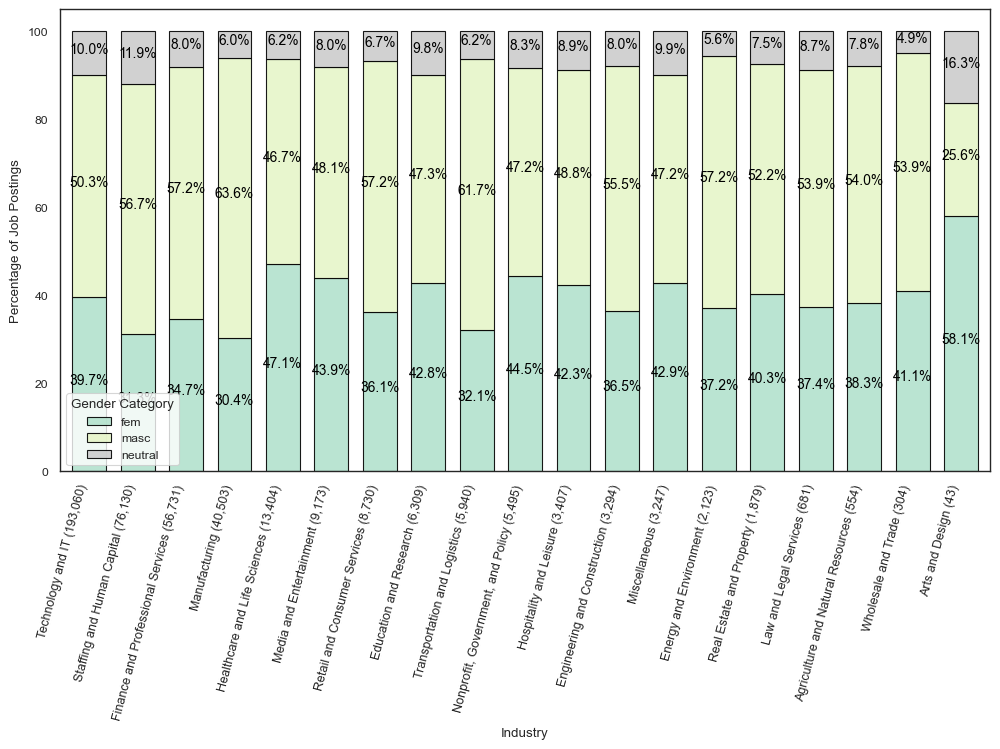

In [37]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
industry_gender_percentages.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax, width=0.7, alpha=0.9, edgecolor="black")

# Apply labels
ax.set_xticks(range(len(industry_labels_with_counts)))
ax.set_xticklabels(industry_labels_with_counts, rotation=60, ha='right', fontsize=9)

plt.xlabel("Industry")
plt.ylabel("Percentage of Job Postings")
# plt.title("Percentage of Job Postings by Gender Category in Top 10 Industries (Sorted by Total Jobs)")
plt.xticks(rotation=75)
plt.legend(title="Gender Category")
# plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in industry_gender_percentages.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=3, color='black')



plt.savefig('Visualizations/grouped_industry.png', bbox_inches='tight')

plt.show()

## Role

In [20]:
top_roles = df['role'].value_counts().nlargest(20)
# Filter dataset to include only these countries
df_filtered_roles = df[df['role'].isin(top_roles.index)]
# Count occurrences of each gender category per country
role_gender_counts = df_filtered_roles.groupby(['role', 'gender_category']).size().unstack(fill_value=0)
# Reorder rows to match the order of 'top_countries'
role_gender_counts = role_gender_counts.loc[top_roles.index]
# Convert counts to percentages within each country
role_gender_percentages = role_gender_counts.div(role_gender_counts.sum(axis=1), axis=0) * 100

In [21]:
# Create custom x-axis labels with counts
role_labels_with_counts = [f"{role} ({role_gender_counts.loc[role].sum():,})" for role in role_gender_counts.index]

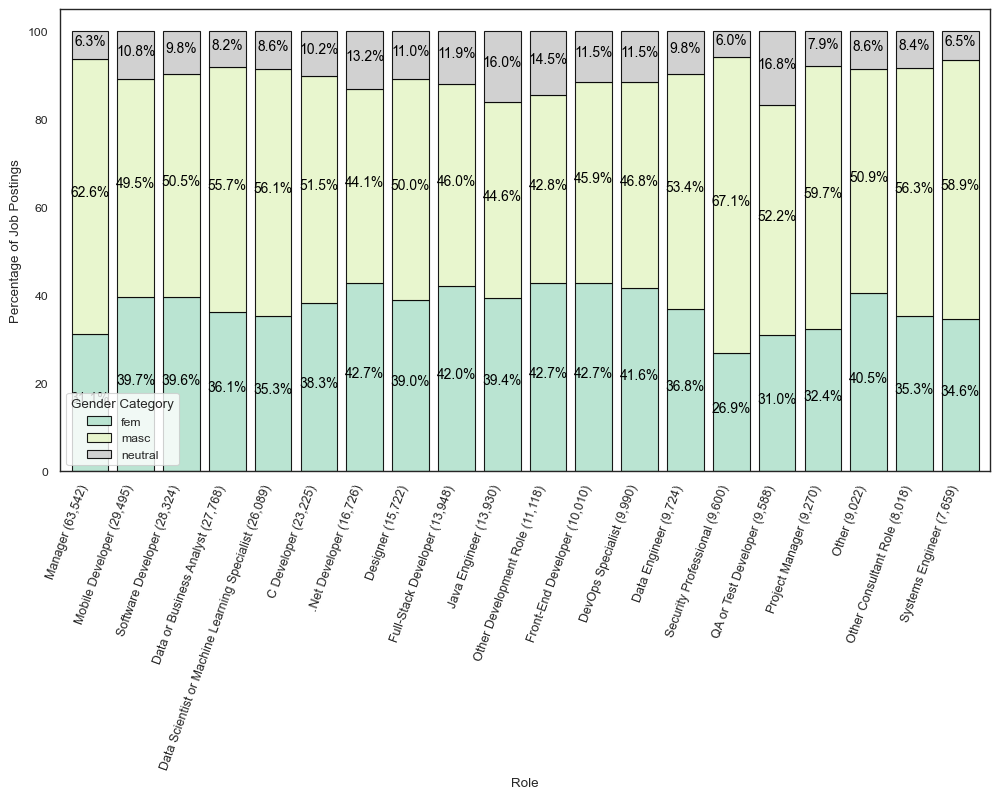

In [24]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
role_gender_percentages.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax, width=0.8, alpha=0.9, edgecolor="black")

# Apply labels
ax.set_xticks(range(len(role_labels_with_counts)))
ax.set_xticklabels(role_labels_with_counts, rotation=70, ha='right', fontsize=9)

plt.xlabel("Role")
plt.ylabel("Percentage of Job Postings")
# plt.title("Percentage of Job Postings by Gender Category in Top 10 Role (Sorted by Total Jobs)")
# plt.xticks(rotation=70)
plt.legend(title="Gender Category")
# plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in role_gender_percentages.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=3, color='black')

plt.savefig('Visualizations/roles.png', bbox_inches='tight')


plt.show()

## Grouped Role

In [10]:
# Define the mapping
role_mapping = {
    'Support Role': ['Support Role', 'Customer Service', 'Professional Services', 'Marketing or Sales Professional'],
    'Back-End': ['.Net Developer', 'Java Engineer', 'Django Developer', 'GIS Developer',  'Kotlin Developer',
                 'Python Engineer', 'C# Developer', 'PHP Developer', 'C++ Developer', 'Rust Developer',
                 'Ruby Developer', 'JEE/J2EE Developer', 'ASP Developer', 'C Developer', 'Software Developer', 'Scala Developer', 'Back-End Developer'],
    'Front-End': ['Front-End Developer', 'TypeScript Developer', 'React Developer', 'JavaScript Developer',
                  'Web Developer', 'SharePoint Developer'],
    'Data and Analytics': ['Data Engineer', 'Data or Business Analyst', 'BI Developer', 'Oracle Developer',
                           'Data Architect', 'Database Developer', 'SQL Developer', 'Spark Developer',
                           'Hadoop Developer', 'SAS Developer', 'Statistical Programmer',
                           'VBA Developer', 'Tibco Developer'],
    'Architect': ['Software/System/IT Architect', 'Solution Architect'],
    'Academic': ['Researcher', 'Academic'],
    'Consultant': ['Other Consultant Role', 'SAP Consultant', 'Business Consultant'],
    'Other': ['Other IT Role', 'Other Head/Lead Role', 'Other Development Role', 'Other Data Role',
              'IT Auditor', 'Matlab Developer', 'Scrum Master', 'Intern', 'Graduate Position'],
    'IT Infrastructure & Operations': ['Infrastructure Engineer', 'IT Engineer', 'Technician', 'Systems Engineer',
                                       'Integration Engineer', 'IT Administrator', 'CRM Developer'],
    'Content Management System': ['Drupal Developer', 'WordPress Developer'],
    'Devops Specialist': ['Solution Delivery', 'DevOps Specialist']
}

In [11]:
# Reverse mapping: role -> grouped_role
flat_mapping = {role: group for group, roles in role_mapping.items() for role in roles}
flat_mapping

{'Support Role': 'Support Role',
 'Customer Service': 'Support Role',
 'Professional Services': 'Support Role',
 'Marketing or Sales Professional': 'Support Role',
 '.Net Developer': 'Back-End',
 'Java Engineer': 'Back-End',
 'Django Developer': 'Back-End',
 'GIS Developer': 'Back-End',
 'Kotlin Developer': 'Back-End',
 'Python Engineer': 'Back-End',
 'C# Developer': 'Back-End',
 'PHP Developer': 'Back-End',
 'C++ Developer': 'Back-End',
 'Rust Developer': 'Back-End',
 'Ruby Developer': 'Back-End',
 'JEE/J2EE Developer': 'Back-End',
 'ASP Developer': 'Back-End',
 'C Developer': 'Back-End',
 'Software Developer': 'Back-End',
 'Scala Developer': 'Back-End',
 'Back-End Developer': 'Back-End',
 'Front-End Developer': 'Front-End',
 'TypeScript Developer': 'Front-End',
 'React Developer': 'Front-End',
 'JavaScript Developer': 'Front-End',
 'Web Developer': 'Front-End',
 'SharePoint Developer': 'Front-End',
 'Data Engineer': 'Data and Analytics',
 'Data or Business Analyst': 'Data and Analyti

In [12]:
# Apply mapping
df['grouped_role'] = df['role'].map(flat_mapping).fillna(df['role'])
df.head()

Unnamed: 0  jobPostingId  \
0           0      11795027   
1           1      11792909   
2           2      11792825   
3           3      11792393   
4           4      11789549   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       companyDetails  \
0                                                                                                                                                                                            {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:28199', 'name': 'AVG Technologies', 'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200, 'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1631318565050?e=1744848000&v=beta&t=LIHp-tJDzR5-Sq9hZZ4vp6jWFAWCZUrHO_qCZr-NacY', 'expiresAt': 1744848000000, 'height': 200}, {'width': 100, 'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1631318565050?e=1744848000&v=beta&t=ogUWLnpQfZjVGQqVdermna6G2weVrVCi8-VH-uw6ccU', 'expiresAt': 1744848000000, 'height': 100}, {'width': 400, 'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/0/1631318565050?e=1744848000&v=beta&t=MvWvxnfHd0NzgcneRdM9m0V3w9mnGhtuXuG4Z1oN66A', 'expiresAt': 1744848000000, 'height': 400}], 'rootUrl': 'https://media.licdn.com/dms/image/v2/C4E0BAQHSlNdIRIJ0Qg/company-logo_'}}, 'type': 'SQUARE_LOGO'}, '$recipeType': 'com.linkedin.voyager.deco.organization.shared.WebCompactCompany', 'universalName': 'avg', 'url': 'https://www.linkedin.com/company/avg'}, 'company': 'urn:li:fs_normalized_company:28199', '$recipeType': 'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany'}}   
1                                                                                                        {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:1319', 'name': 'Lockheed Martin', 'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200, 'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1668532986109/lockheed_martin_logo?e=1744848000&v=beta&t=zqO3uNbro0oYkT1X4URDVYv1eu1GoOPx_9PskpuIsCU', 'expiresAt': 1744848000000, 'height': 200}, {'width': 100, 'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1668532986109/lockheed_martin_logo?e=1744848000&v=beta&t=KUSDmYH3-NpeHG0nTL-8ZRpwNVxzYo_eaYpIa8P2kf0', 'expiresAt': 1744848000000, 'height': 100}, {'width': 400, 'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/

In [14]:
len(df['grouped_role'].unique())

27

In [28]:
top_roles = df['grouped_role'].value_counts().nlargest(20)
# Filter dataset to include only these countries
df_filtered_roles = df[df['grouped_role'].isin(top_roles.index)]
# Count occurrences of each gender category per country
role_gender_counts = df_filtered_roles.groupby(['grouped_role', 'gender_category']).size().unstack(fill_value=0)
# Reorder rows to match the order of 'top_countries'
role_gender_counts = role_gender_counts.loc[top_roles.index]
# Convert counts to percentages within each country
role_gender_percentages = role_gender_counts.div(role_gender_counts.sum(axis=1), axis=0) * 100

In [29]:
# Create custom x-axis labels with counts
role_labels_with_counts = [f"{role} ({role_gender_counts.loc[role].sum():,})" for role in role_gender_counts.index]

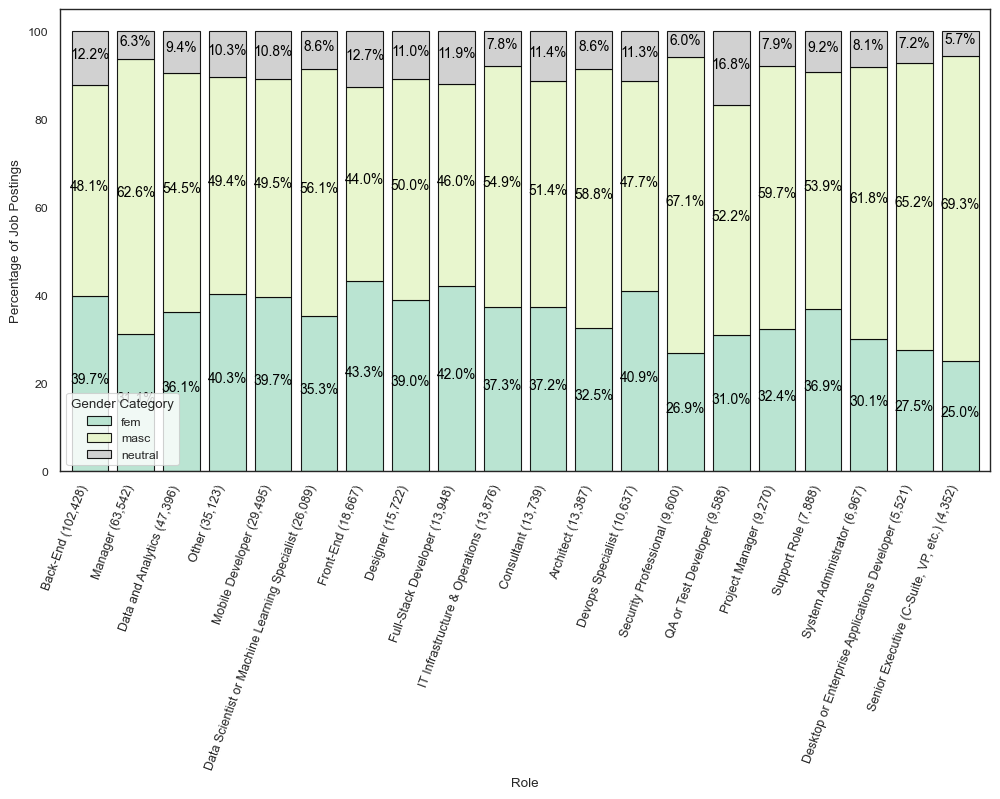

In [30]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
role_gender_percentages.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax, width=0.8, alpha=0.9, edgecolor="black")

# Apply labels
ax.set_xticks(range(len(role_labels_with_counts)))
ax.set_xticklabels(role_labels_with_counts, rotation=70, ha='right', fontsize=9)

plt.xlabel("Role")
plt.ylabel("Percentage of Job Postings")
# plt.title("Percentage of Job Postings by Gender Category in Top 10 Role (Sorted by Total Jobs)")
# plt.xticks(rotation=70)
plt.legend(title="Gender Category")
# plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in role_gender_percentages.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=3, color='black')

plt.savefig('Visualizations/grouped_roles.png', bbox_inches='tight')


plt.show()

## Remote Work Allowed 

In [31]:
df['workRemoteAllowed'] = df['workRemoteAllowed'].astype(str).str.strip().str.upper()
df['workRemoteAllowed'].value_counts()

workRemoteAllowed
FALSE                                               422019
TRUE                                                 47943
SICK AND PERSONAL TIME                                   2
UNDERSTANDING TENANT RIGHTS AND RESPONSIBILITIES         2
SCANNING SOFTWARE                                        1
Name: count, dtype: int64

In [32]:
print(len(df))
# Keep only 'TRUE' and 'FALSE'
df_workRemoteAllowed = df[df['workRemoteAllowed'].isin(['TRUE', 'FALSE'])]
print(len(df_workRemoteAllowed))

469967
469962


In [33]:
work_model_gender_counts = df_workRemoteAllowed.groupby(['workRemoteAllowed', 'gender_category']).size().unstack(fill_value=0)
work_model_gender_percentages = work_model_gender_counts.div(work_model_gender_counts.sum(axis=1), axis=0) * 100

In [34]:
work_model_gender_counts

gender_category,fem,masc,neutral
workRemoteAllowed,,,
FALSE,152480,227756,41783
TRUE,20400,22483,5060


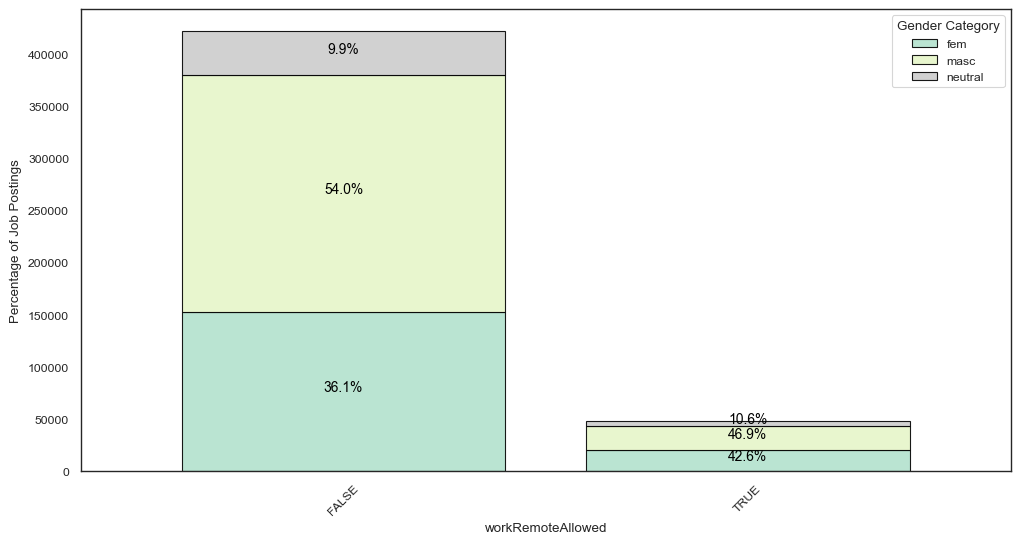

In [35]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
work_model_gender_counts.plot(kind='bar', stacked=True, colormap='Pastel2', ax=ax, width=0.8, alpha=0.9, edgecolor="black")


plt.xlabel("workRemoteAllowed")
plt.ylabel("Percentage of Job Postings")
# # plt.title("Percentage of Job Postings by workRemoteAllowed")
plt.xticks(rotation=45)
plt.legend(title="Gender Category")

# Add percentage labels inside bars
for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in work_model_gender_percentages.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=3, color='black')


plt.savefig('Visualizations/workremoteallowed.png', bbox_inches='tight')


plt.show()

# Pronouns Count

In [16]:
# Counting job ads where each pronoun type appears
grouped = df.groupby('year').agg({
    'masc_pronouns_count': lambda x: (x > 0).sum(),
    'fem_pronouns_count': lambda x: (x > 0).sum(),
    'neutral_pronouns_count': lambda x: (x > 0).sum()
})

In [43]:
# Calculate percentages for label formatting
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

<Figure size 1000x500 with 0 Axes>

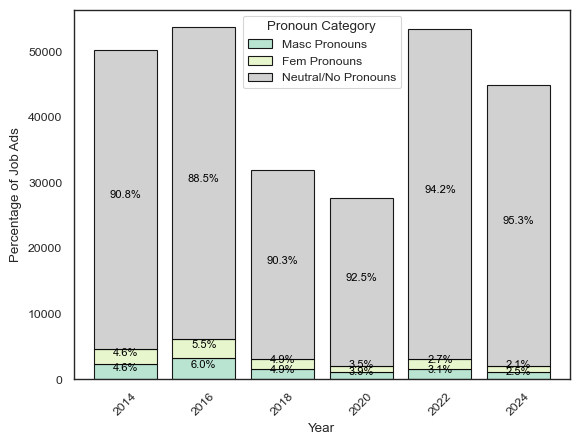

In [159]:
# Plot stacked bar chart
plt.figure(figsize=(10, 5))
ax = grouped.plot(kind='bar', stacked=True, colormap='Pastel2', width=0.8, alpha=0.9, edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Percentage of Job Ads")
# plt.title("Percentage of Job Ads by Pronoun Category Each Year")
plt.xticks(rotation=45)
plt.legend(title="Pronoun Category", labels=['Masc Pronouns', 'Fem Pronouns', 'Neutral/No Pronouns'])
# ax.legend(title='Equal Opportunity Employer', labels=['No', 'Yes'])
# # Add percentage labels on top of each bar
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f%%', label_type='center', padding=3, fontsize=10, color='black', fontweight='bold')


# Add percentage labels at the center of bars
for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in grouped_percentage.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', padding=3, fontsize=8, color='black')


plt.savefig('Visualizations/pronouns.png', bbox_inches='tight')

plt.show()

## Diversity Statements

In [ ]:
# Grouping by year and gender_category
eoe_counts = df.groupby(['year', 'equal_opportunity_employer']).size().unstack()

In [40]:
# Step 1: Create a frequency table
counts = df.groupby(['year', 'equal_opportunity_employer']).size().unstack(fill_value=0)

# Step 2: Convert to percentage for bar labels
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

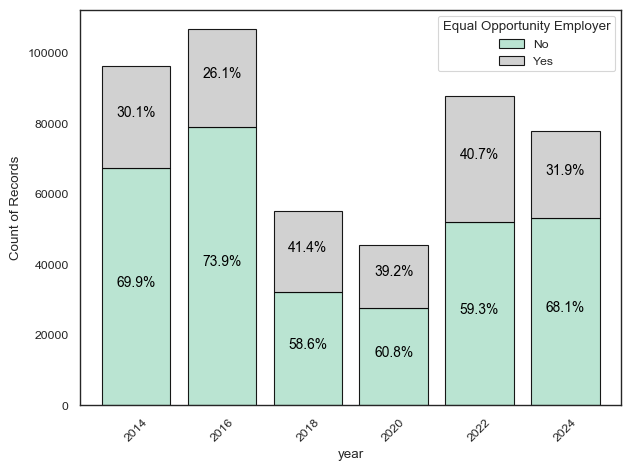

In [160]:
# Step 3: Plot
ax = counts.plot(kind='bar', width=0.8, stacked=True, colormap='Pastel2', alpha=0.9, edgecolor='black')

# Step 4: Add percentage labels
for i, container in enumerate(ax.containers):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in percentages.iloc[:, i]]
    ax.bar_label(container, labels=labels, label_type='center', padding=3, fontsize=10, color='black')

# Optional formatting
ax.set_ylabel("Count of Records")
# ax.set_title("Equal Opportunity Employer by Year")
ax.legend(title='Equal Opportunity Employer', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Visualizations/eoe.png', bbox_inches='tight')

plt.show()

## Other Stats

In [88]:
# Set your percentage threshold (e.g., 1% of total rows)
percentage_threshold = 0.005  # 1%

# Calculate the absolute minimum number of rows
min_rows = df.shape[0] * percentage_threshold

# Drop rows where 'company' is NaN
df_filtered = df.dropna(subset=['country'])

# Now same logic as before
country_stats = (
    df_filtered.groupby('country')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'masc').mean())
    )
)

In [89]:
# Filter companies
country_stats_filtered = country_stats[(country_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_countries = country_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_countries

,total_rows,masc_proportion
country,,
United Kingdom,38573,0.592072
United States of America,243286,0.583971
Ireland,3166,0.548642
Australia,9605,0.533056
Netherlands,3955,0.526928
Canada,13942,0.519725
Singapore,4515,0.512071
Germany,7145,0.511547
Mexico,2895,0.500173


In [90]:
# Now same logic as before
country_stats = (
    df_filtered.groupby('country')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'fem').mean())
    )
)

In [91]:
# Filter companies
country_stats_filtered = country_stats[(country_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_countries = country_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_countries

,total_rows,masc_proportion
country,,
Poland,4566,0.492773
India,70007,0.453183
Romania,2646,0.444444
China,4365,0.440779
Philippines,3334,0.424415
Spain,2752,0.413881
Singapore,4515,0.412625
Germany,7145,0.397481
Canada,13942,0.396428


### role

In [19]:
# Set your percentage threshold (e.g., 1% of total rows)
percentage_threshold = 0.005  # 1%

# Calculate the absolute minimum number of rows
min_rows = df.shape[0] * percentage_threshold

# Drop rows where 'company' is NaN
df_filtered = df.dropna(subset=['grouped_role'])

# Now same logic as before
role_stats = (
    df_filtered.groupby('grouped_role')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'masc').mean())
    )
)

In [20]:
# Filter companies
role_stats_filtered = role_stats[(role_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_roles = role_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_roles

,total_rows,masc_proportion
grouped_role,,
"Senior Executive (C-Suite, VP, etc.)",4352,0.693244
Security Professional,9600,0.670833
Desktop or Enterprise Applications Developer,5521,0.652237
Manager,63542,0.625539
System Administrator,6967,0.618344
Project Manager,9270,0.597195
Architect,13387,0.588481
Data Scientist or Machine Learning Specialist,26089,0.561194
IT Infrastructure & Operations,13876,0.548861


In [22]:
# Now same logic as before
role_stats = (
    df_filtered.groupby('grouped_role')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'fem').mean())
    )
)

In [23]:
# Filter companies
role_stats_filtered = role_stats[(role_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_roles = role_stats_filtered.sort_values(by='masc_proportion', ascending=False)

top_roles

,total_rows,masc_proportion
grouped_role,,
Front-End,18667,0.433171
Full-Stack Developer,13948,0.420490
Devops Specialist,10637,0.409232
Other,35123,0.402528
Back-End,102428,0.397352
Mobile Developer,29495,0.396779
Embedded Applications or Devices Developer,3084,0.393320
Database Administrator,2953,0.392144
Designer,15722,0.389900


### grouped industry

In [38]:
# Set your percentage threshold (e.g., 1% of total rows)
percentage_threshold = 0.005  # 0.5%

# Calculate the absolute minimum number of rows
min_rows = df.shape[0] * percentage_threshold

# Drop rows where 'company' is NaN
df_filtered = df.dropna(subset=['grouped_industry'])

# Now same logic as before
industry_stats = (
    df_filtered.groupby('grouped_industry')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'masc').mean())
    )
)

In [39]:
# Filter companies
industry_stats_filtered = industry_stats[(industry_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_industries = industry_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_industries

,total_rows,masc_proportion
grouped_industry,,
Manufacturing,40503,0.636299
Transportation and Logistics,5940,0.617003
Finance and Professional Services,56731,0.572350
Retail and Consumer Services,8730,0.571707
Staffing and Human Capital,76130,0.567345
Engineering and Construction,3294,0.555252
Technology and IT,193060,0.503367
Hospitality and Leisure,3407,0.488113
Media and Entertainment,9173,0.480868


In [40]:
# Now same logic as before
industry_stats = (
    df_filtered.groupby('grouped_industry')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'fem').mean())
    )
)

In [41]:
# Filter companies
industry_stats_filtered = industry_stats[(industry_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_industries = industry_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_industries

,total_rows,masc_proportion
grouped_industry,,
Healthcare and Life Sciences,13404,0.470904
"Nonprofit, Government, and Policy",5495,0.444950
Media and Entertainment,9173,0.438679
Miscellaneous,3247,0.429011
Education and Research,6309,0.428277
Hospitality and Leisure,3407,0.423246
Technology and IT,193060,0.396747
Engineering and Construction,3294,0.365209
Retail and Consumer Services,8730,0.361397


### Industry

In [73]:
# Set your percentage threshold (e.g., 1% of total rows)
percentage_threshold = 0.005  # 0.5%

# Calculate the absolute minimum number of rows
min_rows = df.shape[0] * percentage_threshold

# Drop rows where 'company' is NaN
df_filtered = df.dropna(subset=['Industry'])

# Now same logic as before
industry_stats = (
    df_filtered.groupby('Industry')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'masc').mean())
    )
)

In [75]:
# Filter companies
industry_stats_filtered = industry_stats[(industry_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_industries = industry_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_industries

,total_rows,masc_proportion
Industry,,
defense and space manufacturing,14295,0.778524
aviation and aerospace component manufacturing,2468,0.636953
insurance,3812,0.598636
business consulting and services,12074,0.596240
financial services,23789,0.594603
retail,5898,0.589352
manufacturing,2407,0.572497
staffing and recruiting,76017,0.567215
pharmaceutical manufacturing,2467,0.562627


In [80]:
# Now same logic as before
industry_stats = (
    df_filtered.groupby('Industry')
    .agg(
        total_rows=('gender_category', 'size'),
        masc_proportion=('gender_category', lambda x: (x == 'fem').mean())
    )
)

In [81]:
# Filter companies
industry_stats_filtered = industry_stats[(industry_stats['total_rows'] >= min_rows)]

# Sort and display top 5
top_industries = industry_stats_filtered.sort_values(by='masc_proportion', ascending=False).head(20)

top_industries

,total_rows,masc_proportion
Industry,,
hospitals and health care,6233,0.543398
telecommunications,8546,0.494383
entertainment providers,2407,0.452015
higher education,2632,0.441489
advertising services,4247,0.432070
semiconductor manufacturing,3350,0.422985
computers and electronics manufacturing,2484,0.406602
software development,72552,0.394903
banking,4234,0.393245


## Frequently Used Words

In [96]:
all_words = []
for words in df['fem_words_list']:
    all_words.extend(ast.literal_eval(words))

# Count word frequencies
word_counts = Counter(all_words)

In [97]:
word_counts

Counter({'communication': 326064,
         'responsibility': 306840,
         'responsible': 206494,
         'excellent': 173352,
         'value': 166215,
         'implement': 131932,
         'community': 106338,
         'collaborate': 98801,
         'committed': 94831,
         'collaboration': 77201,
         'participate': 77042,
         'personal': 71456,
         'together': 65773,
         'contribute': 64790,
         'care': 64682,
         'collaborative': 59357,
         'share': 56882,
         'interpersonal': 52222,
         'enable': 52068,
         'commitment': 49523,
         'ideal': 47782,
         'serve': 44806,
         'social': 43272,
         'establish': 31107,
         'flexibility': 29476,
         'response': 29287,
         'trust': 28957,
         'connect': 27106,
         'encourage': 25637,
         'collaborating': 24129,
         'shape': 24000,
         'sharing': 23315,
         'teamwork': 21128,
         'enabling': 20838,
         'empowe

In [94]:
all_words = []
for words in df['masc_words_list']:
    all_words.extend(ast.literal_eval(words))

# Count word frequencies
word_counts = Counter(all_words)

In [95]:
word_counts

Counter({'quality': 256768,
         'professional': 222124,
         'strategy': 175282,
         'excellent': 173352,
         'drive': 163120,
         'individual': 157224,
         'deliver': 153780,
         'control': 132648,
         'decision': 114273,
         'success': 108911,
         'perform': 101612,
         'challenge': 99479,
         'successful': 99201,
         'strategic': 93388,
         'initiative': 91683,
         'competitive': 89092,
         'delivering': 80508,
         'power': 78680,
         'operating': 75640,
         'objective': 73438,
         'intelligence': 67008,
         'achieve': 63255,
         'principle': 62885,
         'independently': 55587,
         'active': 52996,
         'organizational': 52686,
         'commercial': 51345,
         'proud': 51057,
         'direct': 50550,
         'driving': 49681,
         'coordinate': 49060,
         'direction': 47912,
         'resolution': 45628,
         'recruiting': 45291,
         'co

## USA Bureau Labour Stats from last 10 years

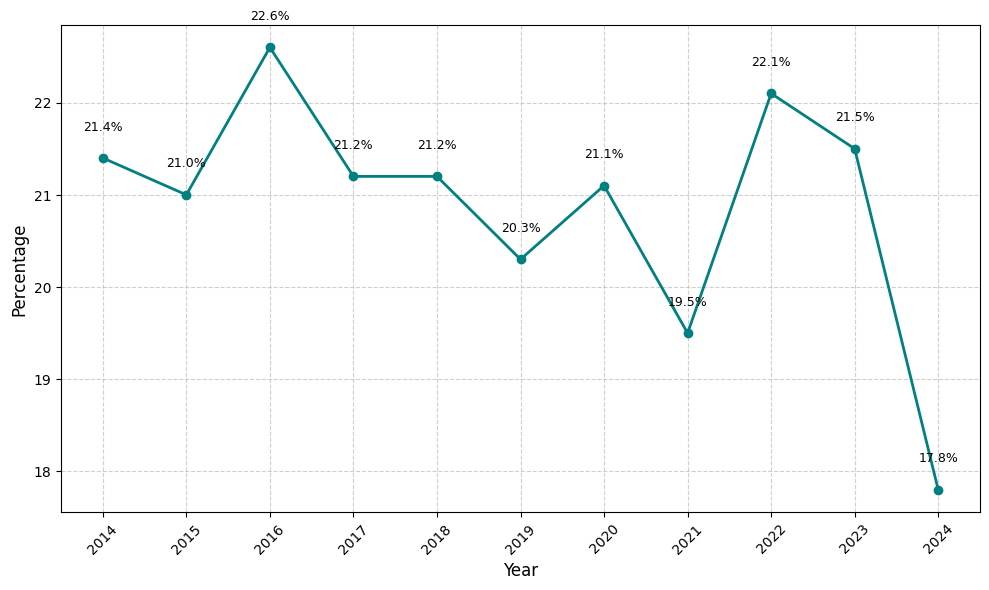

In [15]:
import matplotlib.pyplot as plt

# Data
years = list(range(2014, 2025))
percentages = [21.4, 21.0, 22.6, 21.2, 21.2, 20.3, 21.1, 19.5, 22.1, 21.5, 17.8]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years, percentages, marker='o', linestyle='-', color='teal', linewidth=2)

# Adding labels and title
# plt.title('% of Computer Programmers Employed as Women (2014–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)


# Annotate each data point with its percentage
for x, y in zip(years, percentages):
    plt.text(x, y + 0.3, f'{y}%', ha='center', fontsize=9)
    
plt.tight_layout()
plt.savefig('pct_women_usa.png')
plt.show()

## Companies

In [19]:
top_companies = df['Company ID'].value_counts().nlargest(20)
# Filter dataset to include only these countries
df_filtered_companies = df[df['Company ID'].isin(top_companies.index)]
# Count occurrences of each gender category per country
company_gender_counts = df_filtered_companies.groupby(['Company ID', 'gender_category']).size().unstack(fill_value=0)
# Reorder rows to match the order of 'top_countries'
company_gender_counts = company_gender_counts.loc[top_companies.index]
# Convert counts to percentages within each country
company_gender_percentages = company_gender_counts.div(company_gender_counts.sum(axis=1), axis=0) * 100

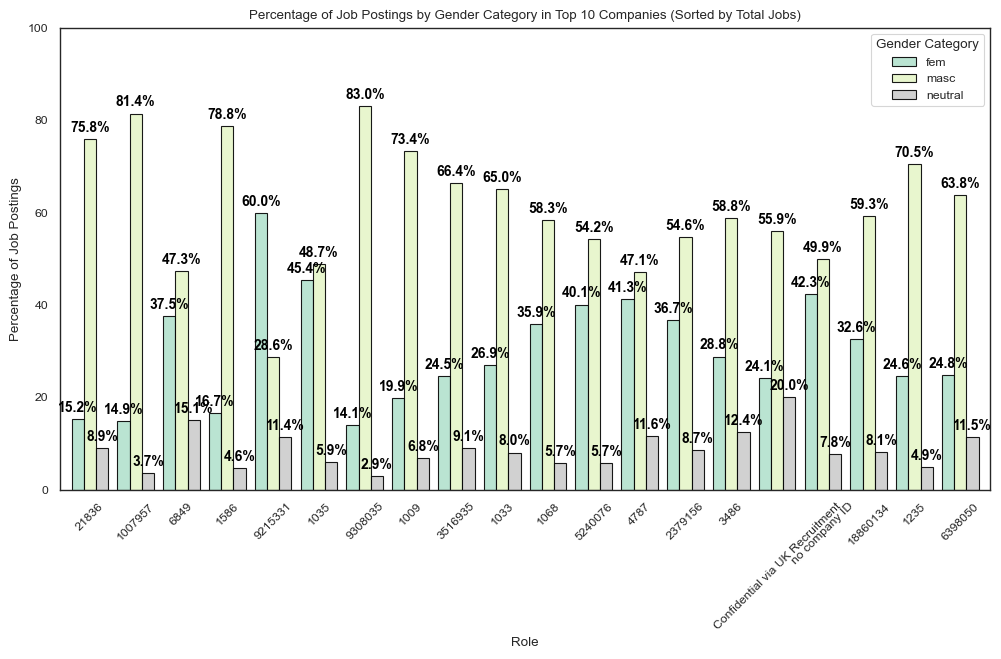

In [20]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
company_gender_percentages.plot(kind='bar', colormap='Pastel2', ax=ax, width=0.8, alpha=0.9, edgecolor="black")


plt.xlabel("Role")
plt.ylabel("Percentage of Job Postings")
plt.title("Percentage of Job Postings by Gender Category in Top 10 Companies (Sorted by Total Jobs)")
plt.xticks(rotation=45)
plt.legend(title="Gender Category")
plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3, color='black', fontweight='bold')


plt.show()

21836 -> cybercoders
1007957 -> Clearancejobs
6849 -> Dice
1586 -> Amazon
-- 9215331 -> Accenture in India
-- 1035 -> Microsoft
9308035 -> Crossover
1009 -> IBM
3516935 -> clickjobs.io
1033 -> Accenture
1068 -> JPMorganChase 
5240076 -> myGwork - LGBTQ+ Business Community
4787 -> Apex Systems 
2479156 -> Triton Technologies
3486 -> Hays 
18860134 -> Jobot 
1235 -> Wells Fargo 
6398050 -> UK Recruitment

In [17]:
# Grouping by role and gender category
gender_distribution = df.groupby(['Company ID', 'gender_category']).size().unstack()

# # Convert counts to percentages per role
gender_distribution_percentage = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

# # Sort by descending order of masculine percentage and choose top 10
gender_distribution_percentage = gender_distribution_percentage.sort_values(by='masc', ascending=False).head(20)

<Figure size 2400x800 with 0 Axes>

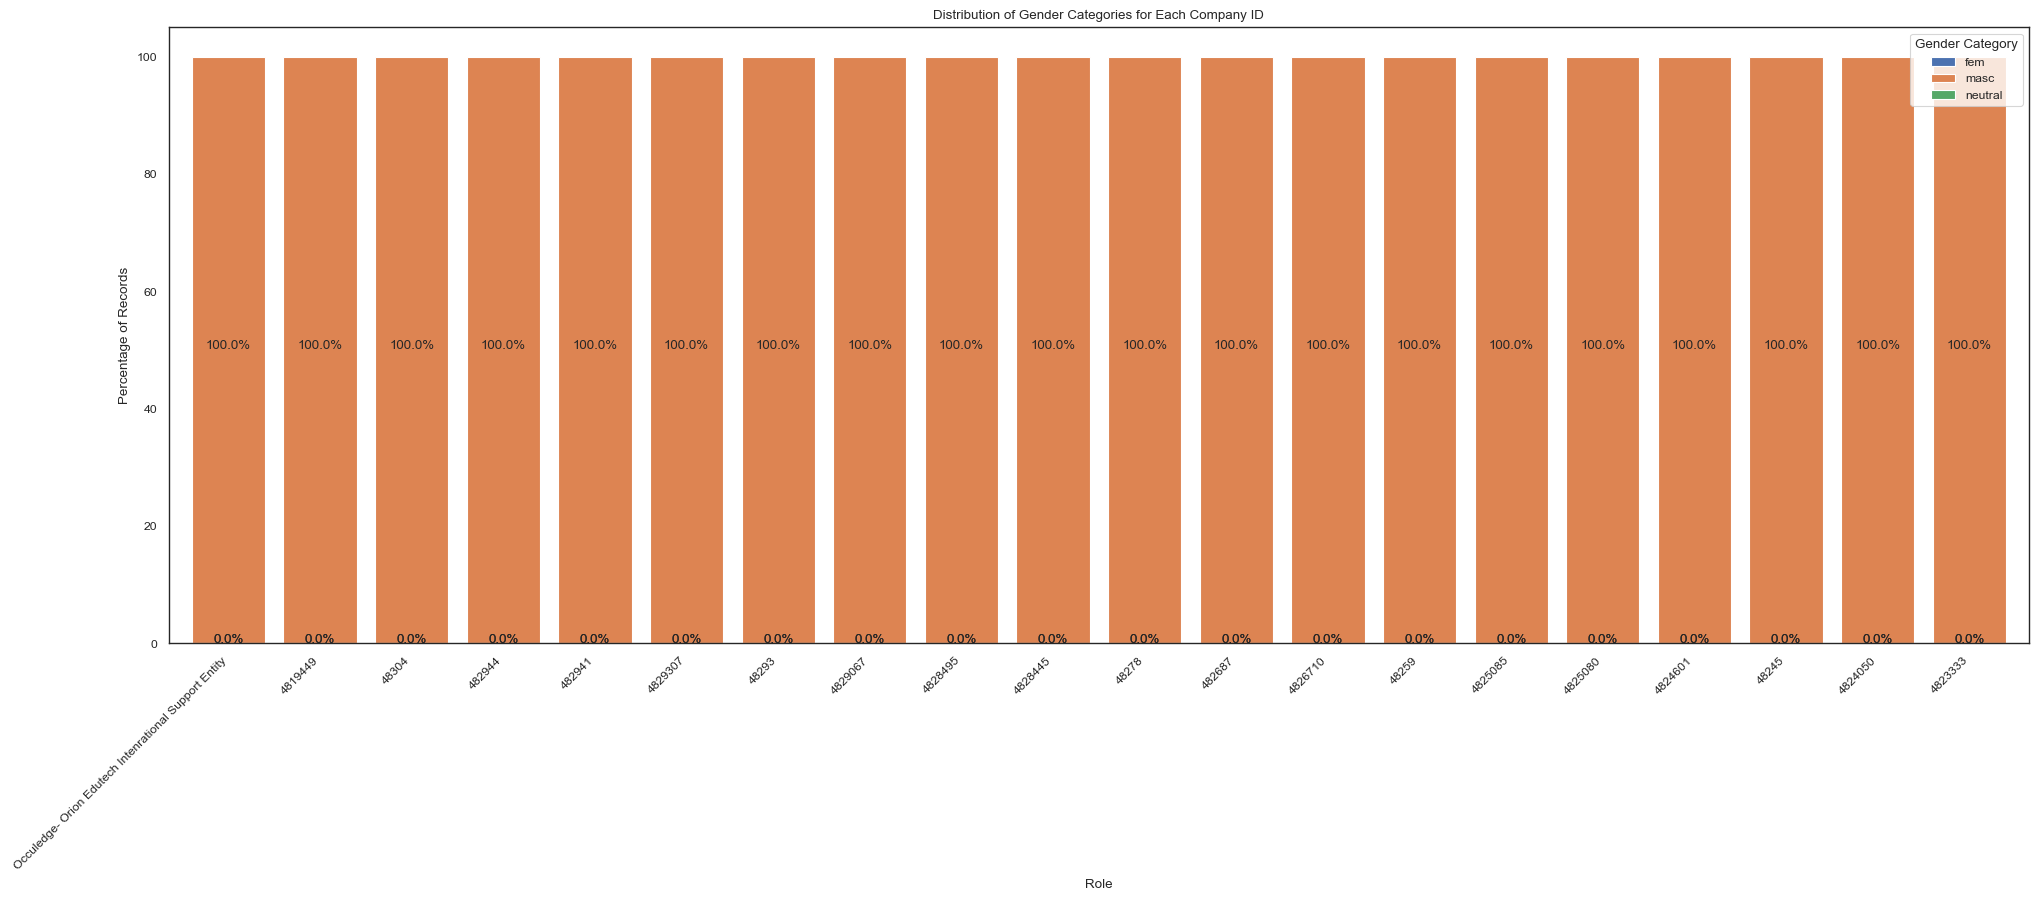

In [18]:
# Plot stacked bar chart
plt.figure(figsize=(24, 8))
ax = gender_distribution_percentage.plot(kind='bar', stacked=True, width=0.8, figsize=(24, 8))
plt.xlabel("Role")
plt.ylabel("Percentage of Records")
plt.title("Distribution of Gender Categories for Each Company ID")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender Category")

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', padding=3)

plt.show()
# check only for more frequently occurring companies

In [24]:
# meta -> 10667
meta = df[df['Company ID']=='10667']

# Count occurrences of each gender category per country
meta_gender_counts = meta.groupby(['Company ID', 'gender_category']).size().unstack(fill_value=0)

# Convert counts to percentages within each country
meta_gender_percentages = meta_gender_counts.div(meta_gender_counts.sum(axis=1), axis=0) * 100

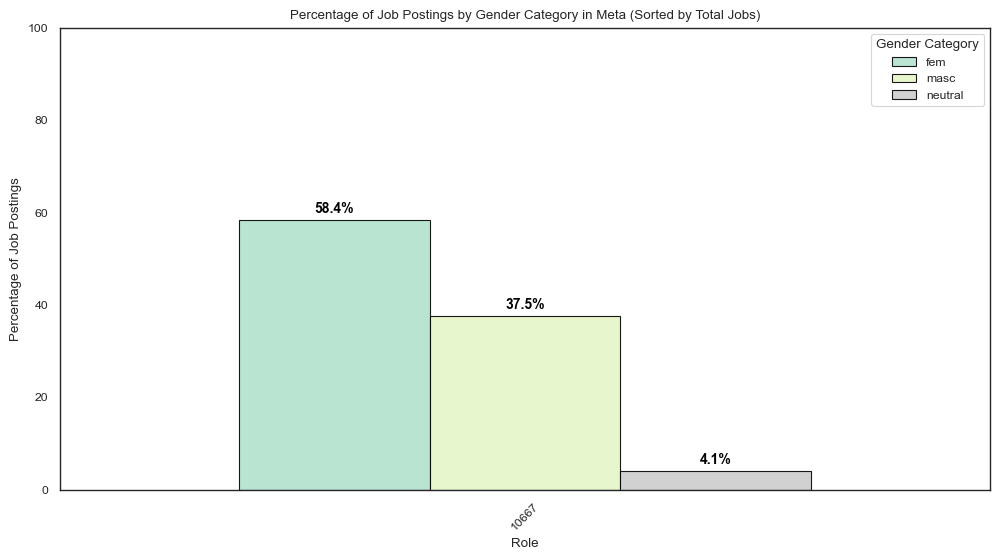

In [25]:
# Find the top 10 most frequent countries (sorted by total job count)
sns.set_theme(style="white")
sns.set_context("paper")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
meta_gender_percentages.plot(kind='bar', colormap='Pastel2', ax=ax, width=0.8, alpha=0.9, edgecolor="black")


plt.xlabel("Role")
plt.ylabel("Percentage of Job Postings")
plt.title("Percentage of Job Postings by Gender Category in Meta (Sorted by Total Jobs)")
plt.xticks(rotation=45)
plt.legend(title="Gender Category")
plt.ylim(0, 100)  # Ensure y-axis represents percentages properly

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3, color='black', fontweight='bold')


plt.show()